In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
from PIL import Image
%matplotlib inline


In [6]:
from tensorflow.keras.models import load_model

In [7]:
#standard model
model_std = load_model("./modele/Model2_4cat_aug_init_densReg.h5")
#fine-tunning model
model_FT = load_model("./modele/FT_vgg16_1.h5")

In [8]:
#load filenames from folder
image_path = "./sample_images/"
file_names = os.listdir(image_path)


In [9]:
def predict(model, np_sample_image):
    #class labels
    labels = {0:"Asfalt", 1:"Kostka", 2:"Polna", 3:"Utwardzona"}
    #model prediction return as one-hot encoding
    one_hot_prediction = model.predict(np_sample_image)
    #class prediction number
    prediction = np.argmax(one_hot_prediction,axis=1)
    predicted_class = labels[prediction[0]]
    return predicted_class

In [10]:
def create_sample_images_list(img_height=220, img_width=220):
    images = []
    for file in file_names:
        #load image from disk
        image = Image.open(image_path+file)
        image = image.resize((img_height, img_width))
        #convert image to NumPy array
        np_image = np.array(image)
        #correct shape from 3 to 4 dimensions (x,y,color_channels) -> (batch_size,x,y,color_channels)
        np_image = np.expand_dims(np_image, axis=0)
        #change range from 0-255 to 0-1
        np_image = np_image /255
        #add image to images list
        images.append(np_image)
    return images

In [11]:
#load files
images_std = create_sample_images_list(220,220)
images_ft  = create_sample_images_list(224,224)
    

Standard model prediction: Kostka
Fine tunning model prediction: Polna


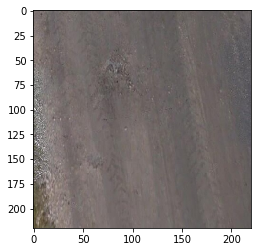

In [17]:
#show image, max 38
image_to_show = 3
#[0] is necessary to get 3 dimensional image, without added 4 dimension 
plt.imshow(images_std[image_to_show][0])
#predict for standard model
prediction_std = predict(model_std,images_std[image_to_show])
#predict for FT model
prediction_ft = predict(model_FT, images_ft[image_to_show])
print(f"Standard model prediction: {prediction_std}")
print(f"Fine tunning model prediction: {prediction_ft}")